# Assignment 3 

In this assignment you will implement a deep convolutional neural network for identification of flower types. 
In the dataset given to you, there are five classes of flowers: chamomile, tulip, rose, sunflower, dandelion.
For each class there are around 800 images. The images are not of the same size and are around 320x240 pixels. 

**Tasks:** Sumbit a single notebook containing implementation and outputs of the 7 steps below. Please make sure the outputs are not cleared when you submit the notebook otherwise you will get 0 marks for the steps for which there is no output shown. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install  split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import lib
import os
import zipfile
import splitfolders
import numpy as np
import scipy

# visualization
import matplotlib.pyplot as plt

#preprocess
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


1. Prepare and Preprocess the data. Divide the dataset into training (80%) and validation (20%) sets. (10 points)

In [ ]:
#Step 1 implementation
#Hint: Take the help of split-folder python library

# extract the zip file
%cd 'drive/MyDrive/Colab_Notebooks/Uni_ADL/2023_01_COMPSCI7327_concept AI ML/Assignment03'
# !unzip -qq flowers.zip

# # split to training and validation
# splitfolders.ratio('flowers', output="output", seed=2023, ratio=(0.8, 0.2,0.0)) 

/content/drive/MyDrive/Colab_Notebooks/Uni_ADL/2023_01_COMPSCI7327_concept AI ML/Assignment03


In [ ]:
# input the datagen
base_dir = './output/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Image rescaling by 1./255 to fit with RGB and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set Parameter
batch_size = 32
img_height = 224    
img_width = 224

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(img_height, img_width),  # All images will be resized to 224x224
        batch_size=batch_size,
        shuffle=True,
        seed=1311,
        class_mode='categorical') # there are more than 2 class to predict

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images
        target_size=(img_height, img_width),  # All images will be resized to 224x224
        batch_size=batch_size,
        shuffle=True,
        seed=1311,
        class_mode='categorical') # there are more than 2 class to predict

Found 3452 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


2. Implement the given CNN architecture. Use an input image size of $224 \times 224 \times 3$ (30 points)

<img src='CNN.png' alt='given CNN'>

In [ ]:
# #Step 2 implementation
model = tf.keras.models.Sequential([
    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    # 2*4096 neuron hidden layer
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    # Only 5 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

3. Train the model. Choose your own parameters for the learning algorithm. (10 points)


In [ ]:
# #Step 3 implementation
model.compile(optimizer=Adam(learning_rate = 0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )
history = model.fit(train_generator, 
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator
                    )
tf.keras.backend.clear_session()

Epoch 1/50
108/108 [==============================] - 2284s 21s/step - loss: 1.4350 - accuracy: 0.3502 - val_loss: 1.3851 - val_accuracy: 0.3512
Epoch 2/50
108/108 [==============================] - 18s 163ms/step - loss: 1.2979 - accuracy: 0.4070 - val_loss: 1.4094 - val_accuracy: 0.3988
Epoch 3/50
108/108 [==============================] - 17s 160ms/step - loss: 1.2819 - accuracy: 0.4157 - val_loss: 1.3815 - val_accuracy: 0.4140
Epoch 4/50
108/108 [==============================] - 18s 162ms/step - loss: 1.2432 - accuracy: 0.4461 - val_loss: 1.2515 - val_accuracy: 0.4709
Epoch 5/50
108/108 [==============================] - 18s 162ms/step - loss: 1.1993 - accuracy: 0.4745 - val_loss: 1.2180 - val_accuracy: 0.4919
Epoch 6/50
108/108 [==============================] - 17s 162ms/step - loss: 1.1604 - accuracy: 0.4971 - val_loss: 1.2051 - val_accuracy: 0.4988
Epoch 7/50
108/108 [==============================] - 17s 160ms/step - loss: 1.1197 - accuracy: 0.5148 - val_loss: 1.1493 - val_ac

4. Report the results. (10 points)


In [ ]:
#Step 4 implementation

def plot_epoch(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'ro', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'ro', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

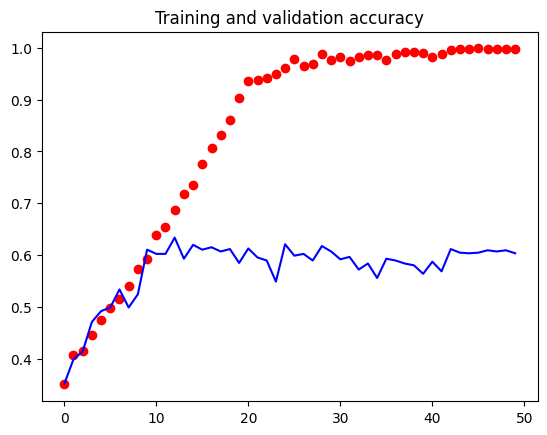

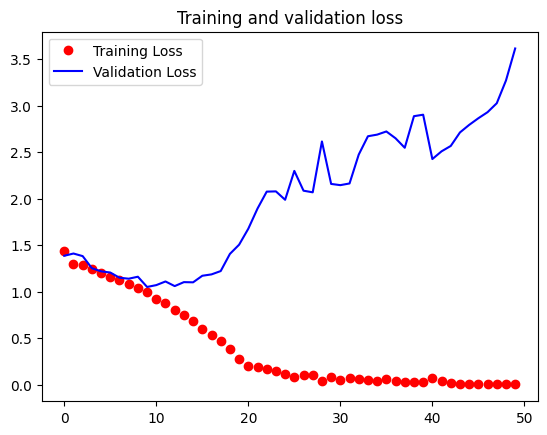

In [ ]:
plot_epoch(history)

5. Test the model by giving it a picture taken by your own phone camera. (10 points)


1/1 [==============================] - 1s 521ms/step


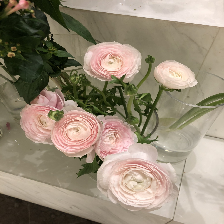

This image most likely belongs to rose with a 40.46 percent confidence.


In [ ]:
# #Step 5 implementation

img = tf.keras.utils.load_img('./output/test/rose/testing_rose_pic.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

predict_name = {i for i in train_generator.class_indices if train_generator.class_indices[i] == np.argmax(score)}
img.show()

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format( list(predict_name)[0], 100 * np.max(score))
)


6. Use the same architecture but now train two different models one with L1 or L2 regularization, and one with batch normalization. Compare the models e.g. their size, number of parameters, convergence time or inference time for one image, and comment on their performance. (15 points)


In [ ]:
# #Step 6 implementation

tf.keras.backend.clear_session()
## with L2 regularization
model_L2 = tf.keras.models.Sequential([
    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    # 2*4096 neuron hidden layer
    tf.keras.layers.Dense(4096, activation = 'relu', kernel_regularizer ='l2'),
    tf.keras.layers.Dense(4096, activation = 'relu', kernel_regularizer ='l2'),
    tf.keras.layers.Dense(4096, activation = 'relu', kernel_regularizer ='l2'),
    # Only 5 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
    ])
model_L2.summary()
model_L2.compile(optimizer=Adam(learning_rate = 0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )
history_L2 = model_L2.fit(train_generator, 
                               epochs=50,
                               verbose=1,
                               validation_data=validation_generator,
                          )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

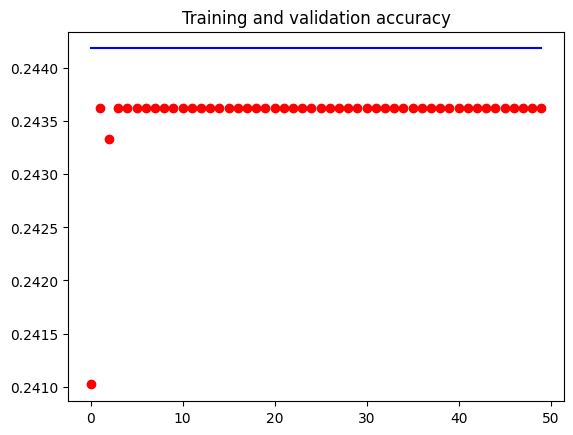

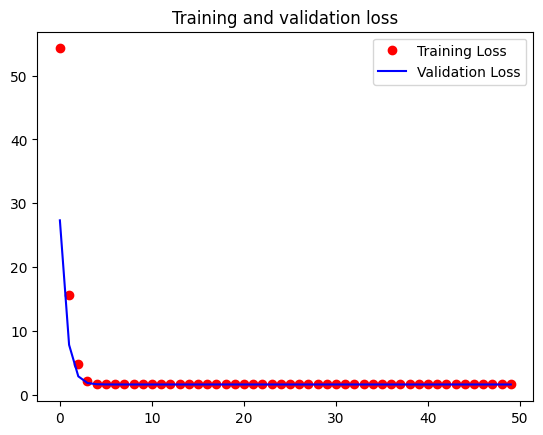

In [ ]:
# L1 and L2 regularization are typically used for smaller networks. For larger networks, it is better to use neural network-specific regularization which is dropout regularization.
plot_epoch(history_L2)

In [ ]:
## with batch normalization

tf.keras.backend.clear_session()
model_batch = tf.keras.models.Sequential([
    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    # 2*4096 neuron hidden layer
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    # Only 5 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
    ])
model_batch.summary()
model_batch.compile(optimizer=Adam(learning_rate = 0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )
history_batch = model_batch.fit(train_generator, 
                               epochs=50,
                               verbose=1,
                               validation_data=validation_generator,
                          )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

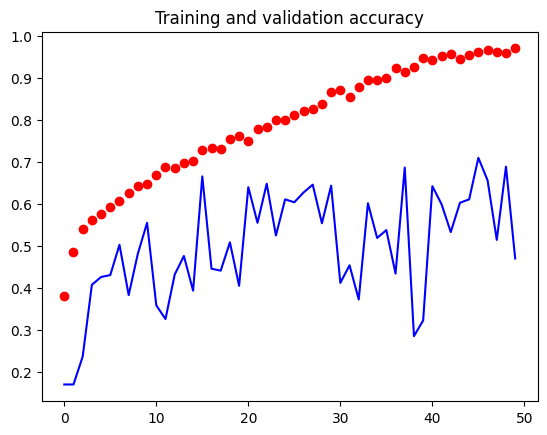

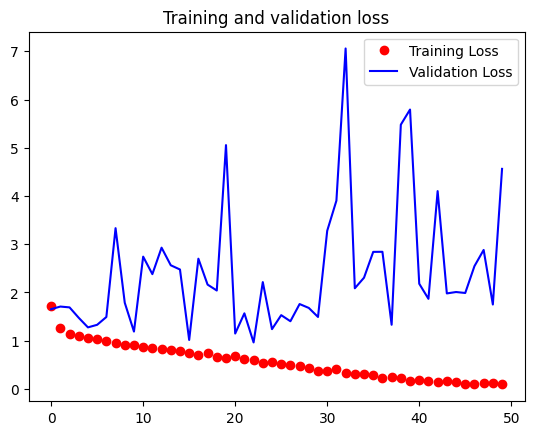

In [ ]:
plot_epoch(history_batch)

The comparison of regularized model to general models:

General Model
- Total params: 50,399,045
- Trainable params: 50,399,045
- Interence time for each steps in epochs: 162 ms or 5.2 ms per image
- Convergence time: Converge after 20 epochs around 2622 s 
After run through 50 epochs and values are converge, 
- Training accuracy reach to 99.86% and loss reduce to 0.0018. On the other hand, both of validation accuracy and loss represent overfitting issues, 60.35% and 3.6133 respectively.


Model applied with L2 regularization
- Total params: 50,399,045
- Trainable params: 50,399,045
- Interence time for each steps in epochs: 164 ms or 5.2 ms per image
- Convergence time: converge after 5 epochs with 89 s
After run through 5 epochs, Training accuracy become stable at 24.36% and loss reach to 1.5988 shown significantly less performance than general model. And, accuracy and loss from validation also represent less overfitting compared to general model as 24.42% and 1.5983 respectively.

Model applied with Batch normalization
- Total params: 50,448,197
- Trainable params: 50,423,621
- Interence time for each steps in epochs: 161 ms or 5.2 ms per image
- Convergence time: not converge yet
After run through 50 epochs
- Training accuracy increase to 96.96% and loss reduce to 0.0955 but it's not coverge yet. On the other hand, both of validation accuracy and loss represent higher overfitting around 46.98% and 4.5615 respectively.




7. Improve the accuracy by trying something extra. For example, you can use a different preprocessing, experiment with the training parameters, try a different solver or loss function, modify the model architecture, use different types of regularization (dropout, data augmentation) or use transfer learning to fine-tune an existing pre-trained model etc. (15 points)


In [ ]:
#Step 7 implementation

tf.keras.backend.clear_session()
# general model with dropout
model_dropout = tf.keras.models.Sequential([

    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    # 2*4096 neuron hidden layer
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    # Only 5 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
    ])

model_dropout.summary()
model_dropout.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )
history_dropout = model_dropout.fit(train_generator, 
                               epochs=50,
                               verbose=1,
                               validation_data=validation_generator,
                          )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [ ]:
history_dropout

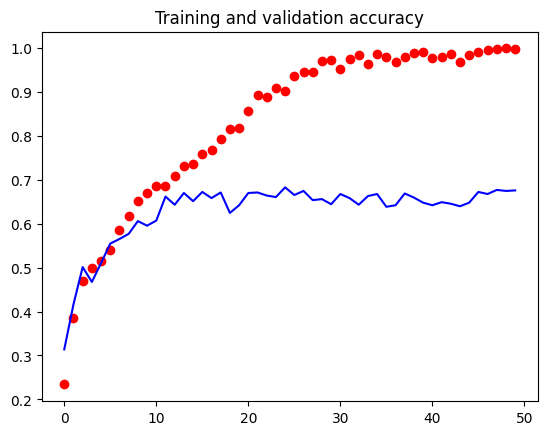

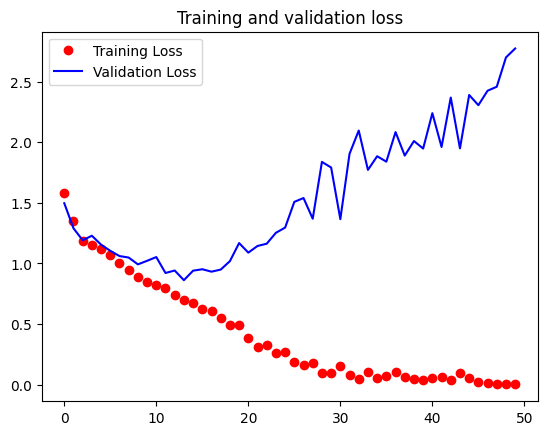

In [ ]:
plot_epoch(history_dropout)

In [ ]:
# try with data augmentation

tf.keras.backend.clear_session()

# data augmentation

train_datagen_augmented = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)

# Flow training images in batches of 32 using train_datagen generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(img_height, img_width),  # All images will be resized to 224x224
        batch_size=batch_size,
        shuffle=True,
        seed=1311,
        class_mode='categorical') # there are more than 2 class to predict

model_aug = tf.keras.models.Sequential([
    
    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    # 2*4096 neuron hidden layer
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    # Only 5 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
    ])

model_aug.summary()
model_aug.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )
history_aug = model_aug.fit(train_generator_augmented, 
                               epochs=50,
                               verbose=1,
                               validation_data=validation_generator
                               )

Found 3452 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)          

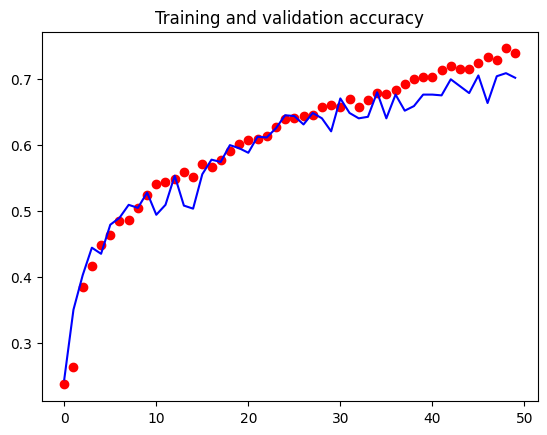

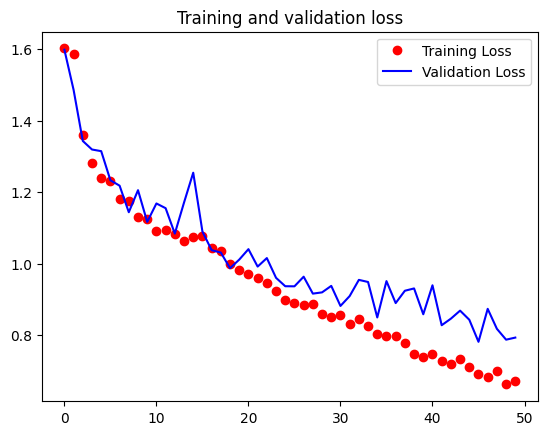

In [ ]:
plot_epoch(history_aug)

In [ ]:
# try with data augmentation with dropout

tf.keras.backend.clear_session()

# data augmentation

model_aug_drop25 = tf.keras.models.Sequential([
    
    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    
    # 2*4096 neuron hidden layer
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    # Only 5 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
    ])

model_aug_drop25.summary()
model_aug_drop25.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )
history_aug_drop25 = model_aug_drop25.fit(train_generator_augmented, 
                               epochs=50,
                               verbose=1,
                               validation_data=validation_generator
                               )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

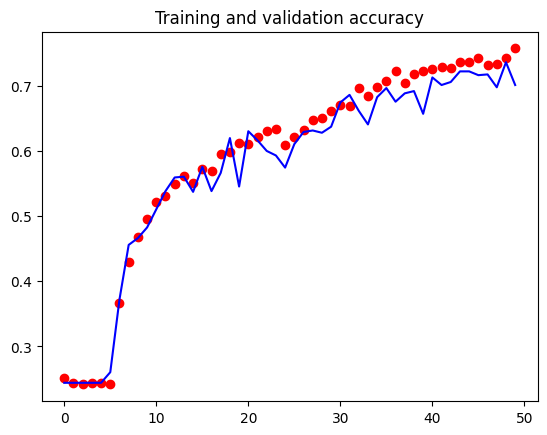

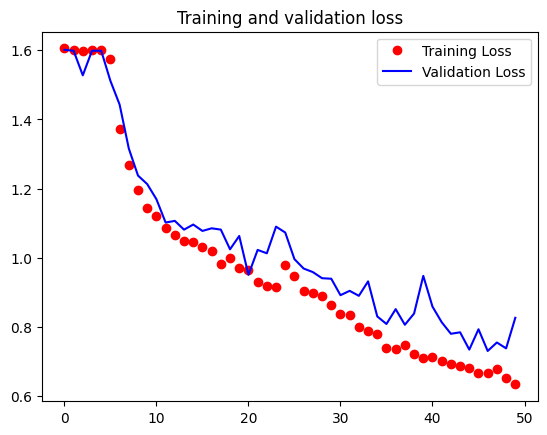

In [ ]:
plot_epoch(history_aug_drop25)

Compared to all model above including general model, L2 regularized model, batch normalization, dropout25% model, data augmentation, and modified augmentation with dropout 25% model.

Model applied with augmentation and dropout 25% shown the reasonable results following high performance, less overfitting with not much lower accuracy for both of train and validation. The detail information following the results below;

Model with dropout 25%
- Total params: 50,448,197
- Trainable params: 50,423,621
- Interence time for each steps in epochs: 452 ms or 11.3 ms per image
- Convergence time: not converge yet
After run through 50 epochs
- Training accuracy increase to 75.72% and loss reduce to 0.6337 but it's not coverge yet. On the other hand, both of validation accuracy and loss represent less overfitting issues compared to other models, 70.12% and 0.8265 respectively.

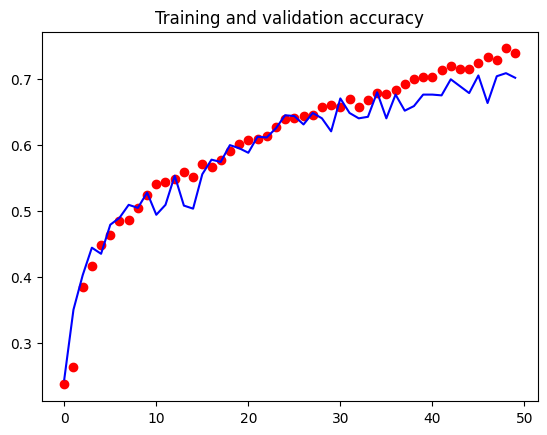

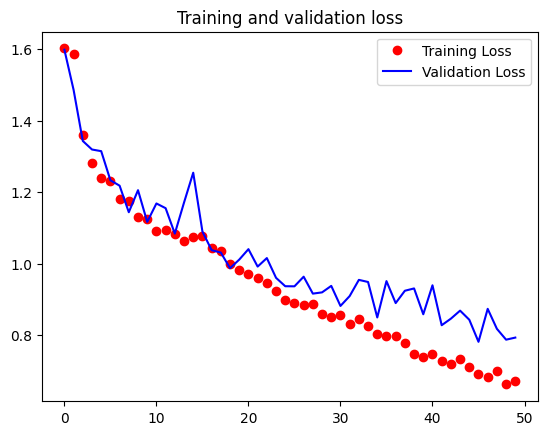

In [ ]:
plot_epoch(history_aug)